In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import cmath
import scipy
from scipy import interpolate
h = 6.62607015e-34 #Planck's constant in Js
h_eV = h/1.6022e-19 #Planck's constant in eVs
hbar = h/(2*np.pi) #reduced Planck's constant
m = 9.1093837e-31 #electron mass in kg
s = 10000 #iterator number where neccessary
a = 10 #length of box from -a/2 to a/2
j = cmath.sqrt(-1)

In [2]:
def bisection(f, d, b, tol=1e-6):
    """
    Find a root of f(x) in the interval a<x<b, using bisection search.

    A valid interval must have a < b, and f(a) and f(b) must have opposite signs.

    Returns: 
        A root of x0, i.e. a solution to f(x0) = 0.

    Args:
        f: function to be studied; should take one argument.
        a: lower end of search interval
        b: upper end of search interval

        tol: error tolerance for result (default: 1e-6)

     If either f(d) or f(b) is zero, then we already have a solution! """
    
    if f(d) == 0:
        return a
    if f(b) == 0:
        return b

    # Spot check for valid interval
    assert b>d
    if f(b) / f(d) > 0:
        return 'invalid interval'

    while (b-d) > tol:
        c = (d+b)/2
        if f(c) / f(d) < 0:
            # c and a have opposite sign: new interval is [d,c]
            b = c
        elif f(c) / f(b) < 0:
            # c and b have opposite sign: new interval is [c,b]
            d = c
        else:
            # Only other possibility is that f(c) was exactly zero!
            return c
    else:
        return (d+b)/2  # Think: why not `return c`?

In [3]:
def Energy(z_zeros):
    E = []
    for i in range(len(z_zeros)):
        Energy = (2*((z_zeros[i])**2)*(hbar**2))/(m*(a**2)) 
        E.append(Energy)  
    return E
def k(Energy_array): #Finds an array of wave numbers k
    k = np.sqrt(2*m*(abs(Energy_array))/hbar**2)
    return k

Text(0, 0.5, 'flux')

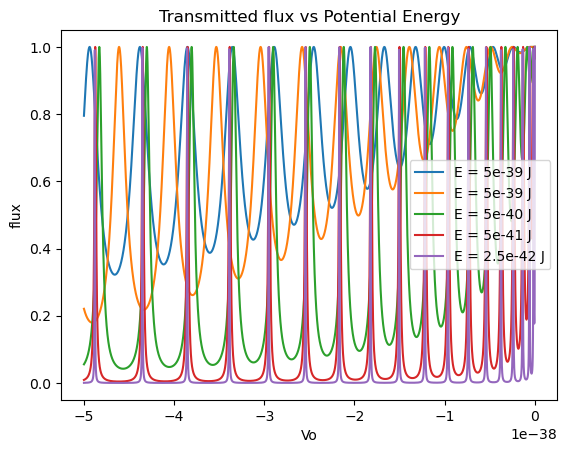

In [4]:
well_potential = np.linspace(-5e-38,0,s) #J
Erange = [np.linspace(0.5e-38,0.5e-38,s),np.linspace(0.25e-38,0.5e-38,s),np.linspace(0.5e-39,0.5e-39,s),np.linspace(0.5e-40,0.5e-40,s),np.linspace(0.25e-41,0.25e-41,s)]
for i in range(len(Erange)):
    q_wellr = np.sqrt((2*m*(Erange[i]-well_potential))/(hbar**2)) #in well wave number
    k_wellr = k(Erange[i])

    Tr = (2*k_wellr*q_wellr)/((2*k_wellr*q_wellr*np.cos(2*q_wellr*a)) + -1*j*(q_wellr**2 + k_wellr**2)*np.sin(2*q_wellr*a))
    T_sqr = (np.abs(Tr))**2
    plt.plot(well_potential, T_sqr, label = f'E = {max(Erange[i])} J')
plt.legend()
plt.title('Transmitted flux vs Potential Energy')
plt.xlabel('Vo')
plt.ylabel('flux')

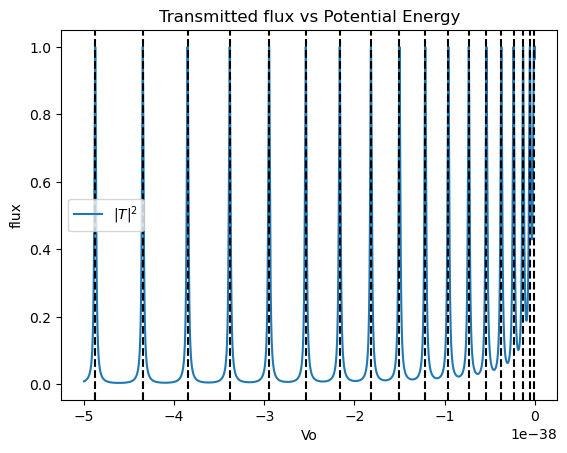

In [91]:
Eparticle = np.linspace(5e-41,5e-41,s) #J
well_potential = np.linspace(-5e-38,0,s) #J


Erange = [np.linspace(0.5e-41,0.5e-41,s),np.linspace(0.5e-42,0.5e-42,s),np.linspace(0.25e-42,0.25e-42,s),np.linspace(0.5e-43,0.5e-43,s),np.linspace(0.25e-43,0.25e-43,s)]

q_wellr = np.sqrt((2*m*(Eparticle-well_potential))/(hbar**2)) #in well wave number
k_wellr = k(Eparticle)

Tr = (2*k_wellr*q_wellr)/((2*k_wellr*q_wellr*np.cos(2*q_wellr*a)) + -1*j*(q_wellr**2 + k_wellr**2)*np.sin(2*q_wellr*a))
T_sqr = (np.abs(Tr))**2
plt.plot(well_potential, T_sqr, label = '$|T|^{2}$')
plt.legend()
plt.title('Transmitted flux vs Potential Energy')
plt.xlabel('Vo')
plt.ylabel('flux')
#plt.ylim(0.5,1.05)
#plt.xlim(-1e-38,0)
#print(T_sq[4300])
#plt.xlim(-1e-38,0)

ints = np.arange(1,19,1)
VooT = []
for i in range(len(ints)):
    Voo = max(Eparticle) + -((ints[i]*np.pi*hbar)**2)/(8*m*a**2)
    VooT.append(Voo)
#print(E_maxT)
for i in range(len(VooT)):
    plt.axvline(VooT[i], color = 'black', linestyle = 'dashed')

(-3.0, 3.0)

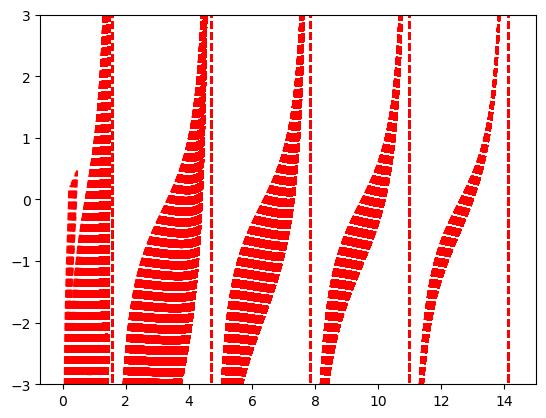

In [62]:
highest_z = []
for i in range(len(well_potential)-2):
#Calculate zo, z, and range to iterate over for a paticular Vo
    zo_Vo2 = (a/hbar)*np.sqrt(m*abs(well_potential[i])/2)
    KErange = np.linspace(well_potential[i]+1e-40, 1e-60,s)
    zrange2 = (k(KErange)*(a/2))[::-1]
#Ensure there are no negative square roots for the spline
    validrange = []
    for n in range(len(zrange2)):
        if ((zo_Vo2/(zrange2[n]))**2 - 1) > 0:
            validrange.append(zrange2[n])
        else:
            break
    #if len(validrange) < 1000:
     #   print(i)
#Build the spline off of the discrete ydiff function
    diffreal = (np.tan(validrange) - np.sqrt((zo_Vo2/validrange)**2 - 1))
    diff2 = scipy.interpolate.CubicSpline(validrange, diffreal)
    
    
    #def y_diff2(z):
     #   diff2 = (np.tan(z) - np.sqrt((zo_Vo2/z)**2 - 1))
      #  return diff2  
  #  if 0 <= i <= 2061:
     #   z_maximum = bisection(y_diff2,12,13.5)
     #   highest_z.append(z_maximum)
   # if 0 <= i <= 1099:
    #    z_maximum = bisection(y_diff2,12,13.5)
     #   highest_z.append(z_maximum)
    
#Iterate through all Vo's and find highest z -- highest eigenstate
    if 0 <= i <= 2061:
        z_maximum = bisection(diff2,12,13.5)
        highest_z.append(z_maximum)
    if 2062 <= i <= 5380:
      #  z_maximum = bisection(y_diff2,9.2,10.25)
      #  highest_z.append(z_maximum)
    if 2062 <= i <= 5380:
       z_maximum = bisection(diff2,9.2,10.25)
       highest_z.append(z_maximum)
   # if 4939 <= i <= 5380:
    #    z_maximum = bisection(diff2,9.2,10.25)
     #   highest_z.append(z_maximum)
    if 5381 <= i <= 7774:
        z_maximum = bisection(diff2,6,7.5)
        highest_z.append(z_maximum)
    if 7775 <= i <= 9312:
        z_maximum = bisection(diff2,3,4.5)
        highest_z.append(z_maximum)
    if 9313 <= i <= 9947:
        z_maximum = bisection(diff2,0.6,1.45)
        highest_z.append(z_maximum)
    if 9989 <= i <= 9999:
        z_maximum = bisection(diff2,0.1,0.5)
        highest_z.append(z_maximum)
    
    
    
    plt.plot(validrange,diff2(validrange), label = 'spline', linestyle = 'dashed', color = 'red')
        
   # if i == 0:
    #    ax.plot(validrange,diff2(validrange), color = 'black')   
    
    #if 1099 <= i <= 2061:
      #  plt.plot(zrange2,y_diff2(zrange2),label = f'Vo = {round((well_potential[i]*1e38),2)}')
  #  if i == 1788:
      #  z_maximum = bisection(y_diff2,12,13.5)
       # highest_z.append(z_maximum)
      #  print(highest_z[-1])
#print(highest_z)
#print(highest_z[2061]) 
#print(highest_z[2062]) 
#print(len(highest_z))
#for w in range(len(highest_z)):
 #   if highest_z[w] == 9.724845039844514:
    #    print(w)
#EBSNT = -1*(Energy(highest_z) - well_potential[0:4976])
#print(EBSNT2)

#plt.xlim(12.6,12.8)
plt.ylim(-3,3)
#plt.ylabel(r'$tan(z) - \sqrt{(\frac{zo}{z})^2 - 1}$')
#plt.xlabel('z')


#wellspacetwo = np.linspace(-5e-38,0,len(z_maximum))

In [60]:
#print(highest_z)

In [64]:
KinEn = Energy(highest_z)
EBSNT = []
for i in range(len(KinEn)):
    if i <= 9947:
        E1 = (KinEn[i] + well_potential[i])
        EBSNT.append(E1)
    if 9989 <= i <= 9999:
        E2 = (KinEn[i] + well_potential[i])
        EBSNT[i].append(E2)

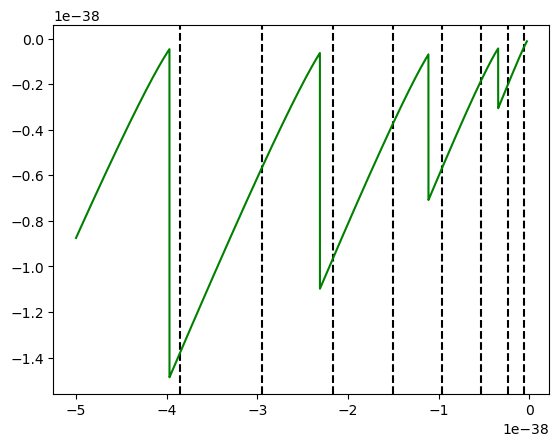

In [86]:
ints = np.arange(1,9,1)
VooT = []
for i in range(len(ints)):
    Voo = max(Eparticle) + -((ints[i]*np.pi*hbar)**2)/(2*m*a**2)
    VooT.append(Voo)
    plt.axvline(VooT[i], color = 'black', linestyle = 'dashed')
plt.plot(well_potential[0:9948], EBSNT, color = 'green')

INTERVALS, INDEXES
(12,13.5) - (0, 2061)
(9.2,10.25) - (2062, 5380)
(6, 7.5) - (5381, 7774)
(3,4.5) - (7775, 9312)
(0.6, 1.45) - (9313, 9947)
(0.1, 0.5) - (9989, 9999)
1099

Prospective ranges
(12, 13.5)
(8.75,10.25)
(5, 7.75)
(2,4.75)
(0.5, 1.75)
(0, 0.5)

check formulas, mess with units to see if scale on above graph is correct. 

# Use cubic spline interpolation from scipy for root finding

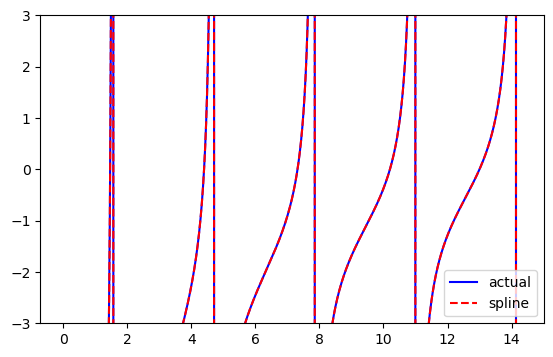

In [14]:
zo_t1 = (a/hbar)*np.sqrt(m*abs(well_potential[0])/2)
Eranget1 = np.linspace(well_potential[0]+1e-40, 1e-60,s)
KEt1 = np.linspace(well_potential[0]+1e-40, 1e-60,s)
zt1 = (k(KEt1)*(a/2))[::-1]
difft1 = (np.tan(zt1) - np.sqrt((zo_t1/zt1)**2 - 1))

zo_t = (a/hbar)*np.sqrt(m*abs(well_potential[0])/2)
KEt = np.linspace(well_potential[0]+1e-40, 1e-60,s)
zt = (k(KEt)*(a/2))[::-1]
difft = (np.tan(zt) - np.sqrt((zo_t/zt)**2 - 1))

diffspline = scipy.interpolate.CubicSpline(zt, difft)
fig, ax = plt.subplots(figsize=(6.5, 4))
ax.plot(zt1,difft1, label = 'actual', color = 'blue')
ax.plot(zt,diffspline(zt), label = 'spline', linestyle = 'dashed', color = 'red')
ax.set_ylim(-3,3)
#ax.set_xlim(12.25,13.5)
plt.legend()





(-3.0, 3.0)

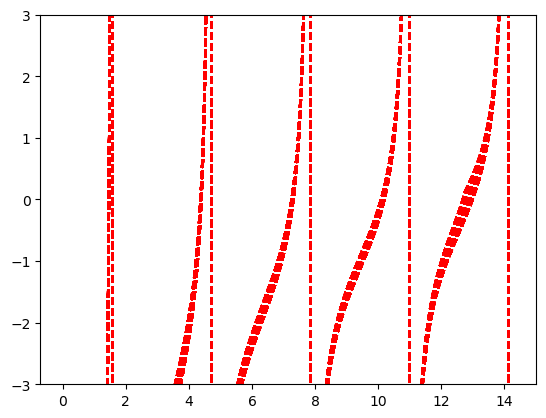

In [15]:
w = []
for i in range(0,2061):
    zo_t = (a/hbar)*np.sqrt(m*abs(well_potential[i])/2)
    KEt = np.linspace(well_potential[i]+1e-40, 1e-60,s)
    zt = (k(KEt)*(a/2))[::-1]
    difft = (np.tan(zt) - np.sqrt((zo_t/zt)**2 - 1))

    diffspline = scipy.interpolate.CubicSpline(zt, difft)
    #fig, ax = plt.subplots(figsize=(6.5, 4))
    plt.plot(zt,diffspline(zt), label = 'spline', linestyle = 'dashed', color = 'red')
    ax.set_ylim(-3,3)
    A_zero = bisection(diffspline,12,13.5)
    w.append(A_zero)
#print(w)
plt.ylim(-3,3)